In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

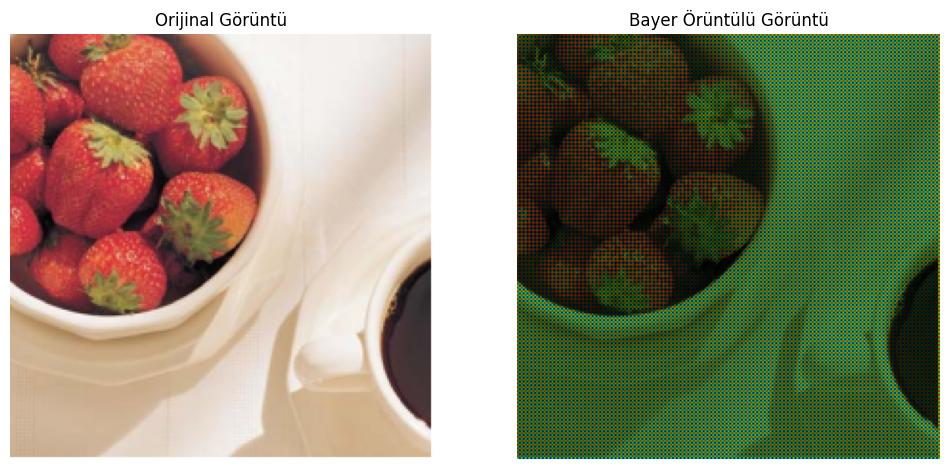

In [2]:
image_path = "picture.png"
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def apply_bayer_pattern(image):
    bayer_pattern = np.zeros_like(image)
    bayer_pattern[0::2, 0::2, 0] = image[0::2, 0::2, 0]  
    bayer_pattern[0::2, 1::2, 1] = image[0::2, 1::2, 1]  
    bayer_pattern[1::2, 0::2, 1] = image[1::2, 0::2, 1]  
    bayer_pattern[1::2, 1::2, 2] = image[1::2, 1::2, 2]  
    return bayer_pattern

bayer_image = apply_bayer_pattern(image_rgb)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Orijinal Görüntü")
plt.axis("off")

# Bayer Örüntülü Görüntü
plt.subplot(1, 2, 2)
plt.imshow(bayer_image)
plt.title("Bayer Örüntülü Görüntü")
plt.axis("off")

plt.show()


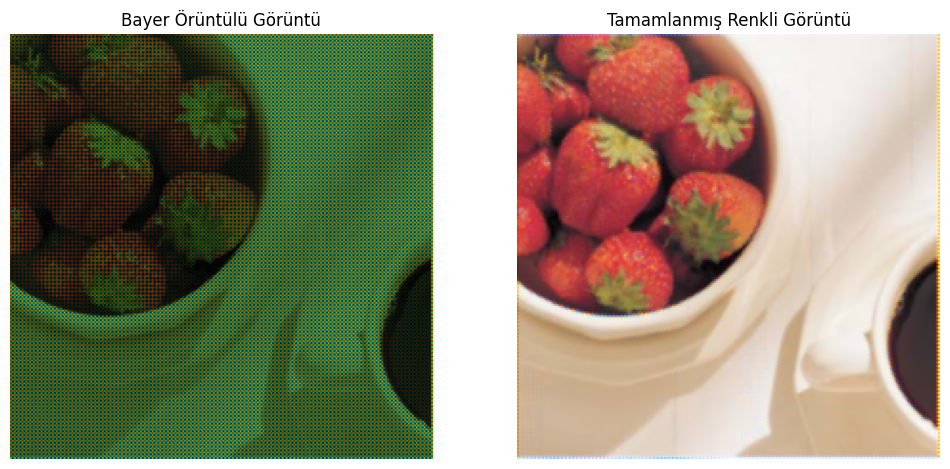

In [4]:
rows, cols, _ = bayer_image.shape
R = np.zeros((rows, cols), dtype=np.float64)
G = np.zeros((rows, cols), dtype=np.float64)
B = np.zeros((rows, cols), dtype=np.float64)

R[0::2, 0::2] = bayer_image[0::2, 0::2, 0] 
B[1::2, 1::2] = bayer_image[1::2, 1::2, 2]  
G[0::2, 1::2] = bayer_image[0::2, 1::2, 1]  
G[1::2, 0::2] = bayer_image[1::2, 0::2, 1]  

R[1::2, :] = (np.roll(R, 1, axis=0) + np.roll(R, -1, axis=0))[1::2, :] / 2
R[:, 1::2] = (np.roll(R, 1, axis=1) + np.roll(R, -1, axis=1))[:, 1::2] / 2

G[0::2, 0::2] = (np.roll(G, 1, axis=0) + np.roll(G, -1, axis=0) + np.roll(G, 1, axis=1) + np.roll(G, -1, axis=1))[0::2, 0::2] / 4
G[1::2, 1::2] = (np.roll(G, 1, axis=0) + np.roll(G, -1, axis=0) + np.roll(G, 1, axis=1) + np.roll(G, -1, axis=1))[1::2, 1::2] / 4

B[0::2, :] = (np.roll(B, 1, axis=0) + np.roll(B, -1, axis=0))[0::2, :] / 2
B[:, 0::2] = (np.roll(B, 1, axis=1) + np.roll(B, -1, axis=1))[:, 0::2] / 2

R = np.clip(R, 0, 255).astype(np.uint8)
G = np.clip(G, 0, 255).astype(np.uint8)
B = np.clip(B, 0, 255).astype(np.uint8)

demosaiced_image = cv2.merge((R, G, B))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bayer_image)
plt.title("Bayer Örüntülü Görüntü")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(demosaiced_image)
plt.title("Tamamlanmış Renkli Görüntü")
plt.axis("off")
plt.show()

In [5]:
mae_R = np.mean(np.abs(image_rgb[:, :, 0] - demosaiced_image[:, :, 0]))
mae_G = np.mean(np.abs(image_rgb[:, :, 1] - demosaiced_image[:, :, 1]))
mae_B = np.mean(np.abs(image_rgb[:, :, 2] - demosaiced_image[:, :, 2]))
mae_total = (mae_R + mae_G + mae_B) / 3

print(f"MAE for Red channel: {mae_R}")
print(f"MAE for Green channel: {mae_G}")
print(f"MAE for Blue channel: {mae_B}")
print(f"Total MAE (average across channels): {mae_total}")

mse_R = np.mean((image_rgb[:, :, 0] - demosaiced_image[:, :, 0]) ** 2)
mse_G = np.mean((image_rgb[:, :, 1] - demosaiced_image[:, :, 1]) ** 2)
mse_B = np.mean((image_rgb[:, :, 2] - demosaiced_image[:, :, 2]) ** 2)
mse_total = (mse_R + mse_G + mse_B) / 3

print(f"MSE for Red channel: {mse_R}")
print(f"MSE for Green channel: {mse_G}")
print(f"MSE for Blue channel: {mse_B}")
print(f"Total MSE (average across channels): {mse_total}")

max_pixel = 255.0 
psnr_R = 20 * np.log10(max_pixel / np.sqrt(mse_R)) if mse_R != 0 else float('inf')
psnr_G = 20 * np.log10(max_pixel / np.sqrt(mse_G)) if mse_G != 0 else float('inf')
psnr_B = 20 * np.log10(max_pixel / np.sqrt(mse_B)) if mse_B != 0 else float('inf')
psnr_total = (psnr_R + psnr_G + psnr_B) / 3

print(f"PSNR for Red channel: {psnr_R} dB")
print(f"PSNR for Green channel: {psnr_G} dB")
print(f"PSNR for Blue channel: {psnr_B} dB")
print(f"Total PSNR (average across channels): {psnr_total} dB")

MAE for Red channel: 56.30838530838531
MAE for Green channel: 34.48636419224655
MAE for Blue channel: 58.52933023521259
Total MAE (average across channels): 49.77469324528149
MSE for Red channel: 16.55036484448249
MSE for Green channel: 9.445925563572622
MSE for Blue channel: 16.84358566711508
Total MSE (average across channels): 14.2799586917234
PSNR for Red channel: 35.94272788846867 dB
PSNR for Green channel: 38.378358419707645 dB
PSNR for Blue channel: 35.86645811134333 dB
Total PSNR (average across channels): 36.72918147317321 dB
